## map2loop: From geology layers to outputs to various 3D modelling programs- Hamersley example-gempy

This notebook reads in three layers from  local or remote sources:  geology polygons, orientation data and fault and fold axial trace  polylines; and calculates the topological relationships between the different features. Requires compiled cpp code from Vitaliy Ogarko

This all gets fed into successive tolopogical and geometric transfroms that end up feeding into gempy to make a 3D model 

<img src='../graphics/map_sm.png'>

In [1]:
import sys, os
sys.path.append("../../..")
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"

sys.path.append('../')
sys.path.append('../../gempy/')

from map2loop import m2l_export
import gempy as gp
%matplotlib inline

#newwd="C:\\Users\\00073294\Dropbox\\loop_minex\\map2model\\"
#os.chdir(newwd)
# print("Current Working Directory " )
# #gdal_data = os.environ['GDAL_DATA']
# print("***",gdal_data)
# print('is dir: ' + str(os.path.isdir(gdal_data)))
# gcs_csv = os.path.join(gdal_data, 'gcs.csv')
# print('is file: ' + str(os.path.isfile(gcs_csv)))
# st = os.stat(gcs_csv)
# print('is readable: ' + str(bool(st.st_mode & stat.S_IRGRP)))
# print(os.getenv('PROJ_LIB'))
# print(os.getcwd())


#m2l_utils.v()

Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'C:\\Users\\legui\\AppData\\Local\\Temp\\try_flags_rne3innp.c:4:19: fatal error: cudnn.h: No such file or directory\r\ncompilation terminated.\r\n'
Mapped name None to device cuda: GeForce RTX 2070 SUPER (0000:01:00.0)


## Create bounding box based on inputs

## Now we define the basic model and load the orientation and lithological information
mj: We inset the model dimensions as once reprojects the edge pixels of the topography are undefined. Probably doesn't need to be that extreme (unit is metres). Could use parameter <b>maxtopo</b> to 

In [2]:
bbox=(500057, 7455348, 603028, 7567953)
model_top=1200
model_base=-2000

test_data_name='test_data3'
output_path = '../test_data3/output/'

In [3]:
test_data_name='test_data3'
test_data_path='../'+test_data_name+'/'

os.chdir(test_data_path)
%run -i "m2l_config.py"

geo_model = gp.create_model(test_data_name) 

# If depth coordinates are much smaller than XY the whole system of equations becomes very unstable. Until
# I fix it properly in gempy this is a handcrafted hack
ve = (bbox[0] - bbox[2]) / (model_base - model_top) / 2

Default parameters loaded from ../test_data3/m2l_config.py:
#ROI

step_out=0.1   #padding arounf dtm to ensure reprojected dtm covers target area (in degrees)
inset=0      #unused??

minx=500057  #region of interest coordinates in metre-based system (or non-degree system)
maxx=603028
miny=7455348
maxy=7567953
model_top=1200
model_base=-8200

#PATHS

local_paths=True       #flag to use local or WFS source for data inputs (True = local)

test_data_path='../test_data3/'

geology_file='hams2_geol.shp'   #input geology file (if local)
fault_file='GEOS_GEOLOGY_LINEARSTRUCTURE_500K_GSD.shp' #input fault file (if local)
structure_file='hams2_structure.shp' #input bedding orientation file (if local)
mindep_file='mindeps_2018.shp' #input mineral deposit file (if local)

#CRS

src_crs = {'init': 'EPSG:4326'}  # coordinate reference system for imported dtms (geodetic lat/long WGS84)
dst_crs = {'init': 'EPSG:28350'} # coordinate system for data

#CODES AND LABELS 
# these refer to specific fields (

In [4]:
bbox=(500057, 7455348, 603028, 7567953)
model_top=1200
model_base=-2000

The vertical exageration is:  16.08921875
Active grids: ['regular']
Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cuda
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                                    values
range                              161039
$C_o$                         6.17468e+08
drift equations  [3, 3, 3, 3, 3, 3, 3, 3]
closing vtk


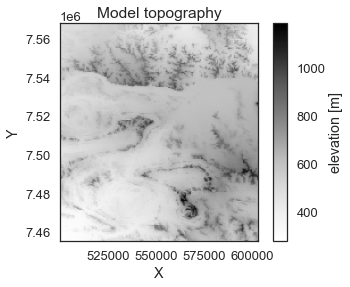

In [9]:
geo_model = m2l_export.loop2gempy(test_data_name,tmp_path,vtk_path,output_path+'orientations_clean.csv',
                                  output_path+'contacts_clean.csv',tmp_path+'groups_clean.csv',
                                  bbox, model_base, model_top,  vtk=True, dtm_reproj_file=dtm_reproj_file)

ValueError: cannot reshape array of size 33425 into shape (191,174)

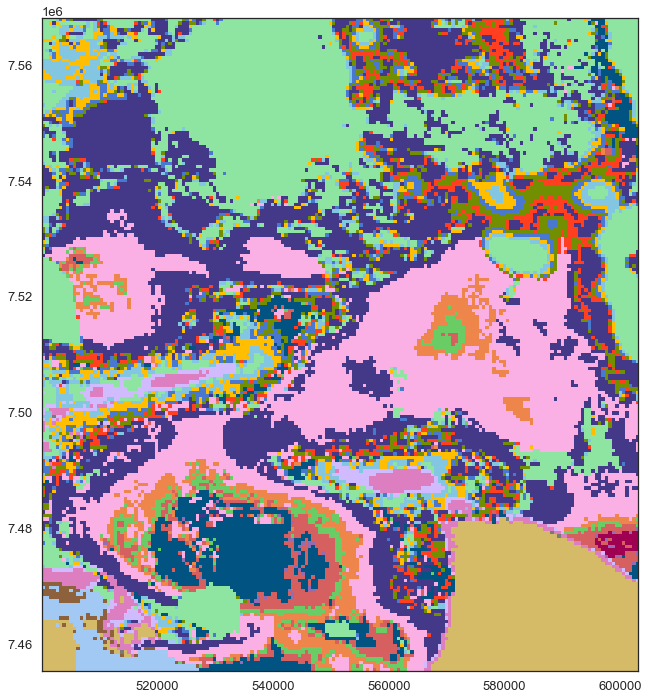

In [10]:
gp.plot.plot_map(geo_model, show_data=False, contour_lines=False)

In [13]:
gp.plot.plot_3D(geo_model, render_data=False)

closing vtk
